In [3]:
# Important Libraries
import pandas as pd

## Understand and Preprocess the Data
### Objetives
- Understand the structure and contents of your dataset.
- Ensure the data is clean (no unnecessary columns, duplicates, or incorrect types).
- Have basic statistical summaries for exploration.

In [5]:
# Load the data
file_path = 'sales.csv'  # Update this path if necessary
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [6]:
# Check dataset structure
print("Dataset Shape:", data.shape)  # Number of rows and columns
print("\nColumns in the dataset:", data.columns.tolist())  # Column names

# Check for missing values
print("\nMissing Values in each column:")
print(data.isnull().sum())

# Check data types
print("\nData Types of each column:")
print(data.dtypes)

Dataset Shape: (640840, 10)

Columns in the dataset: ['Unnamed: 0', 'store_ID', 'day_of_week', 'date', 'nb_customers_on_day', 'open', 'promotion', 'state_holiday', 'school_holiday', 'sales']

Missing Values in each column:
Unnamed: 0             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

Data Types of each column:
Unnamed: 0              int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object


In [7]:
# Clean the data

# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])
    print("'Unnamed: 0' column dropped.")

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
print("'date' column converted to datetime format.")

# Check for duplicates and remove if found
duplicates = data.duplicated().sum()
if duplicates > 0:
    data = data.drop_duplicates()
    print(f"{duplicates} duplicate rows removed.")
else:
    print("No duplicate rows found.")

# Display the cleaned dataset's info
data.info()

'Unnamed: 0' column dropped.
'date' column converted to datetime format.
No duplicate rows found.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   store_ID             640840 non-null  int64         
 1   day_of_week          640840 non-null  int64         
 2   date                 640840 non-null  datetime64[ns]
 3   nb_customers_on_day  640840 non-null  int64         
 4   open                 640840 non-null  int64         
 5   promotion            640840 non-null  int64         
 6   state_holiday        640840 non-null  object        
 7   school_holiday       640840 non-null  int64         
 8   sales                640840 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 44.0+ MB


In [8]:
# Check unique values in each column
for column in data.columns:
    unique_values = data[column].unique()
    if len(unique_values) <= 10:
        print(f"Column: {column}")
        print(f"Number of unique values: {len(unique_values)}")
        print(f"Sample unique values: {unique_values[:10]}")  # Display first 10 unique values
        print("-" * 40)

Column: day_of_week
Number of unique values: 7
Sample unique values: [4 6 2 7 3 5 1]
----------------------------------------
Column: open
Number of unique values: 2
Sample unique values: [1 0]
----------------------------------------
Column: promotion
Number of unique values: 2
Sample unique values: [0 1]
----------------------------------------
Column: state_holiday
Number of unique values: 4
Sample unique values: ['0' 'a' 'c' 'b']
----------------------------------------
Column: school_holiday
Number of unique values: 2
Sample unique values: [0 1]
----------------------------------------


In [9]:
# Generate summary statistics for numerical columns
data.describe()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,school_holiday,sales
count,640840.000000,640840.000000,640840,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,558.211348,4.000189,2014-04-11 02:05:13.957931008,633.398577,0.830185,0.381718,0.178472,5777.469011
min,1.000000,1.000000,2013-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,2013-08-17 00:00:00,405.000000,1.000000,0.000000,0.000000,3731.000000
50%,558.000000,4.000000,2014-04-02 00:00:00,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,837.000000,6.000000,2014-12-12 00:00:00,838.000000,1.000000,1.000000,0.000000,7860.000000
max,1115.000000,7.000000,2015-07-31 00:00:00,5458.000000,1.000000,1.000000,1.000000,41551.000000
std,321.878521,1.996478,NaN,464.094416,0.375470,0.485808,0.382910,3851.338083


## Exploratory Data Analysis (EDA)

### Objetive:
- Explore the dataset to gain insights and understand its characteristics. 

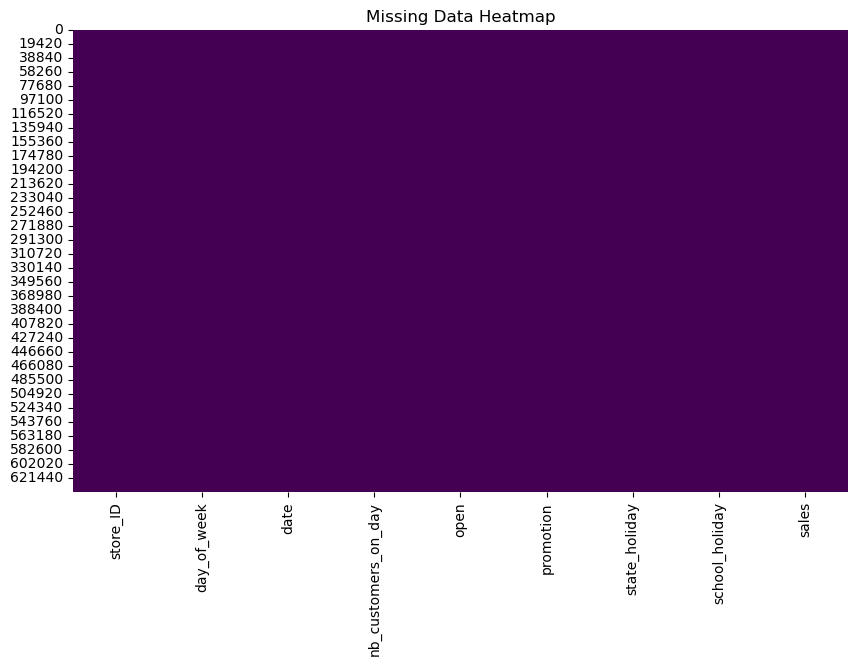

In [11]:
# Visualize missing data
import matplotlib.pyplot as plt
import seaborn as sns

# Plot missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

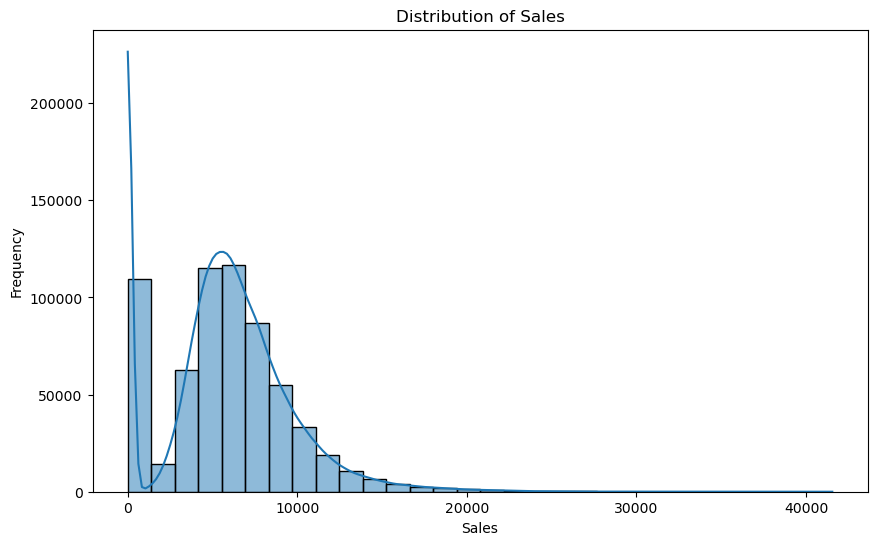

In [12]:
# Step 2.2: Distribution of the 'sales' column
plt.figure(figsize=(10, 6))
sns.histplot(data['sales'], kde=True, bins=30)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

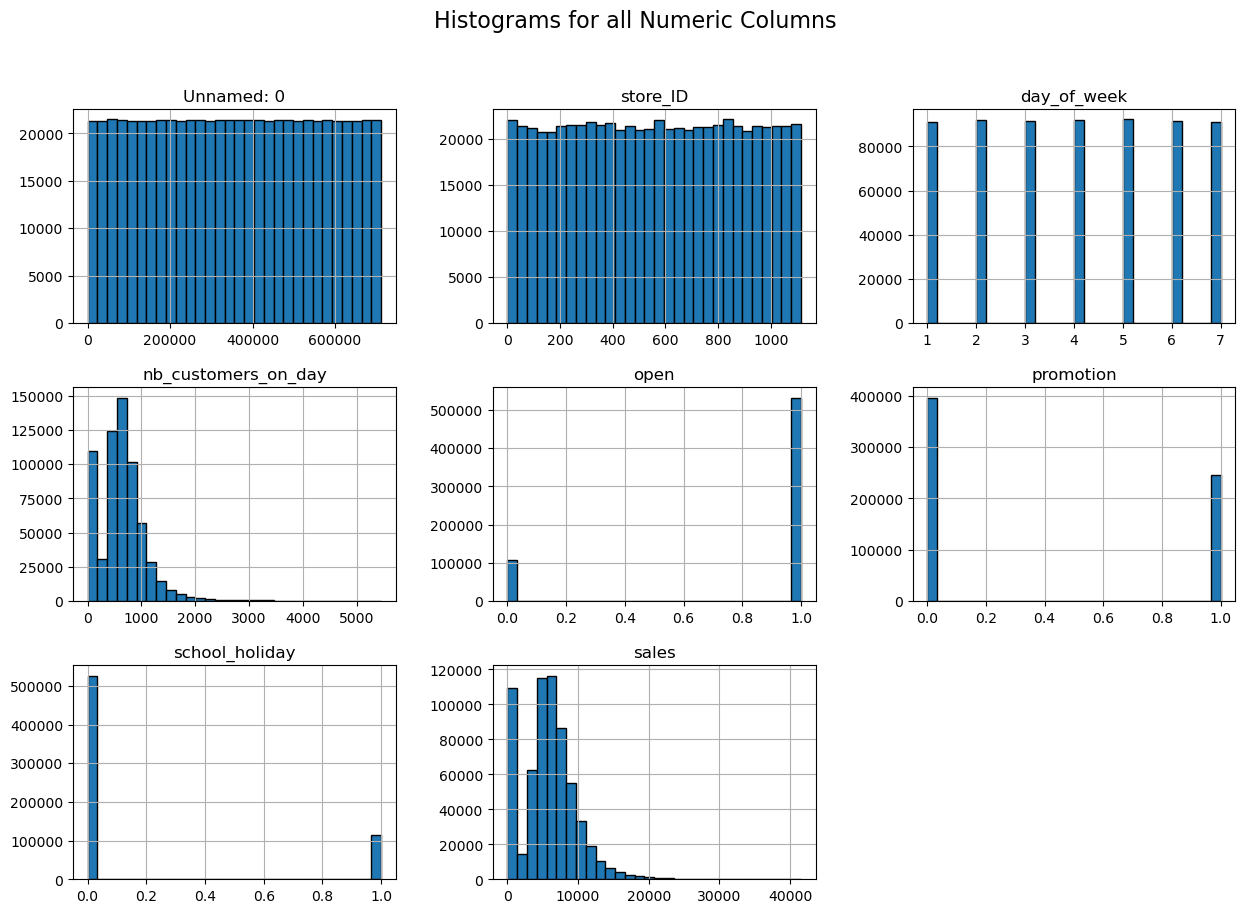

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el DataFrame
file_path = 'sales.csv'  # Ruta al dataset
data = pd.read_csv(file_path)

# Crear histogramas para todas las columnas numéricas
data.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms for all Numeric Columns', fontsize=16)
plt.show()

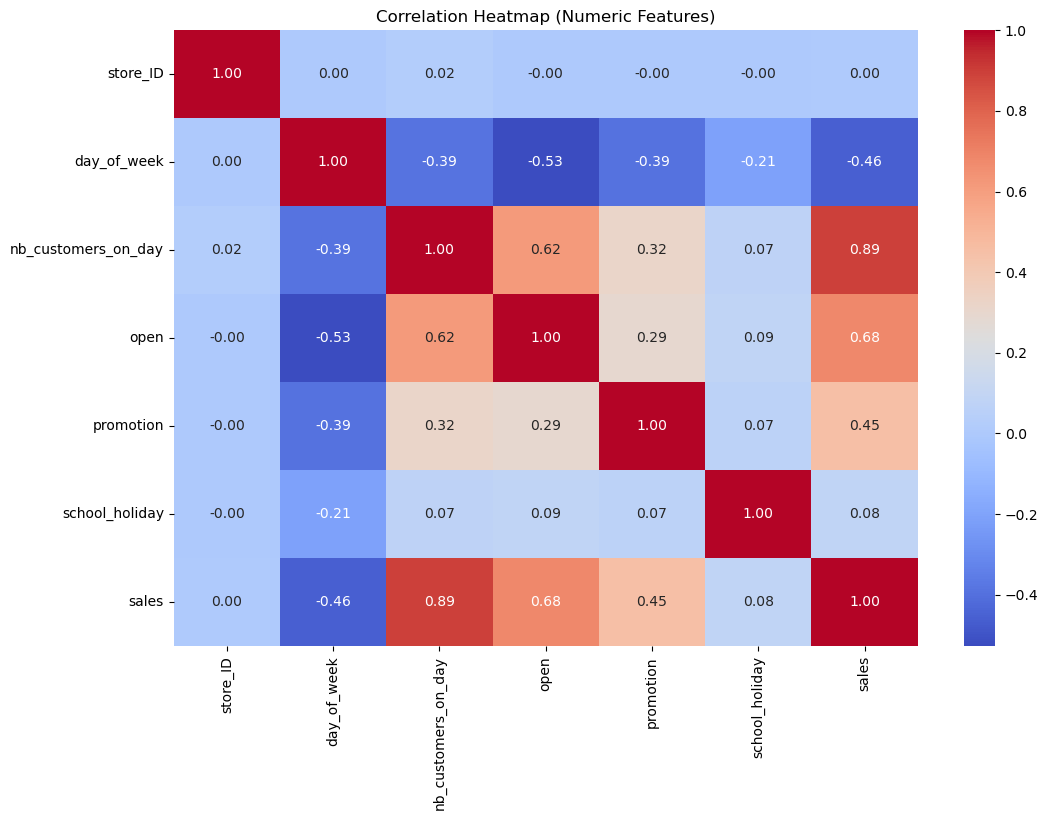

In [13]:
# Filter numeric columns only
numeric_data = data.select_dtypes(include=['number'])  # Select only numerical columns
correlation_matrix = numeric_data.corr()  # Calculate correlation matrix for numeric data

# Plot the correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

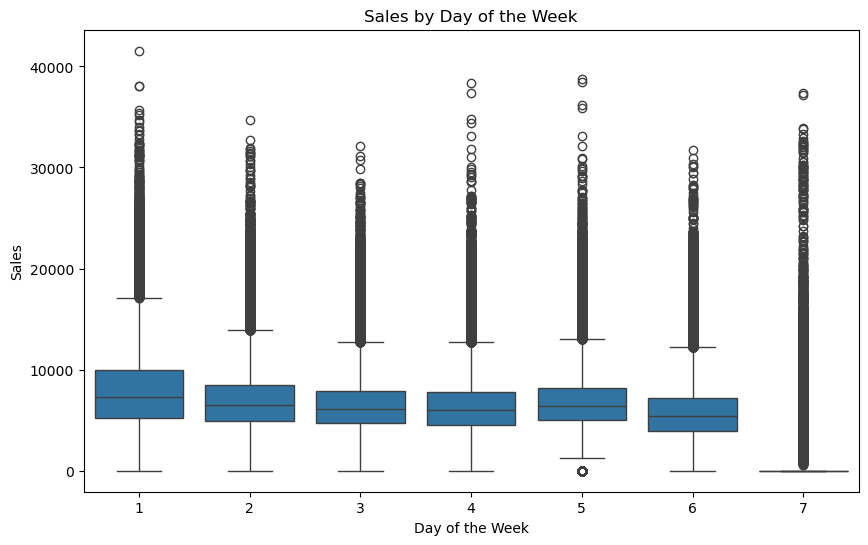

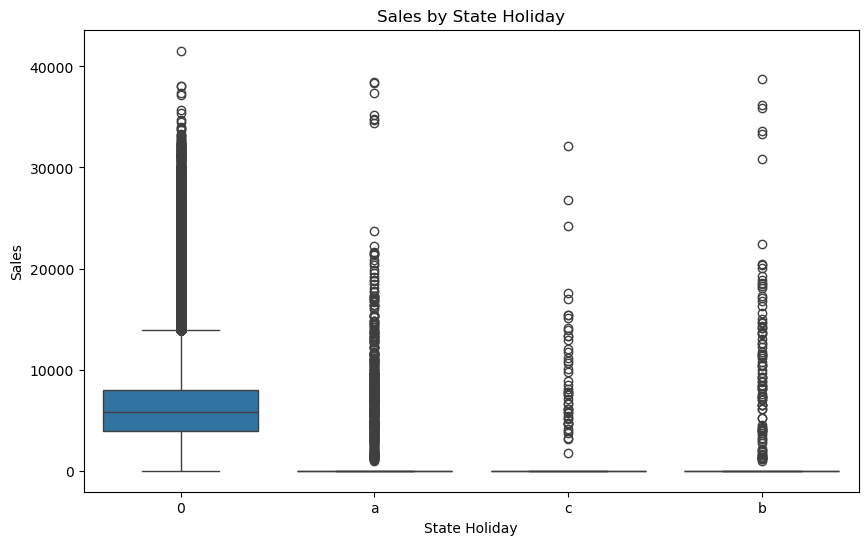

In [14]:
# Boxplot of sales by 'day_of_week'
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='sales', data=data)
plt.title("Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Sales")
plt.show()

# Boxplot of sales by 'state_holiday'
plt.figure(figsize=(10, 6))
sns.boxplot(x='state_holiday', y='sales', data=data)
plt.title("Sales by State Holiday")
plt.xlabel("State Holiday")
plt.ylabel("Sales")
plt.show()

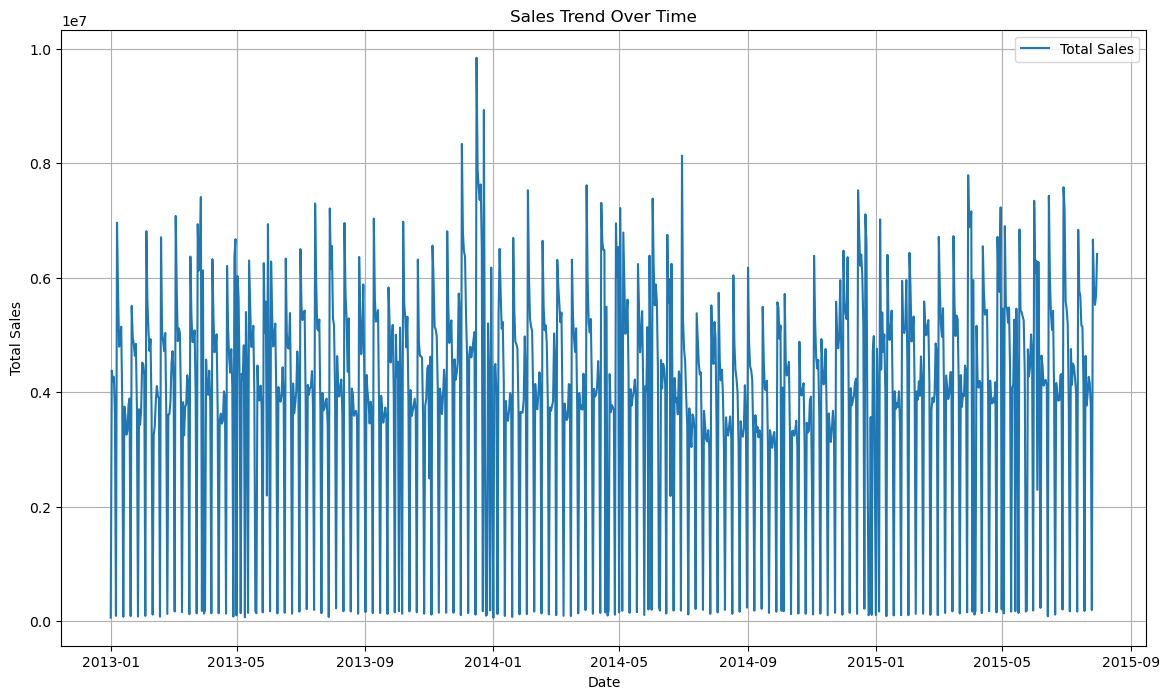

In [15]:
# Step 2.5: Sales trend over time
data_grouped_by_date = data.groupby('date')['sales'].sum().reset_index()

plt.figure(figsize=(14, 8))
plt.plot(data_grouped_by_date['date'], data_grouped_by_date['sales'], label='Total Sales')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid()
plt.show()

## Feature Engineering

In [17]:
# Step 3.1: Extract date features
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['week_of_year'] = data['date'].dt.isocalendar().week
data['day_of_year'] = data['date'].dt.dayofyear

# Display the new columns
data[['date', 'year', 'month', 'day', 'week_of_year', 'day_of_year']].head()

,date,year,month,day,week_of_year,day_of_year
0,2013-04-18,2013,4,18,16,108
1,2015-04-11,2015,4,11,15,101
2,2013-08-29,2013,8,29,35,241
3,2013-05-28,2013,5,28,22,148
4,2013-10-10,2013,10,10,41,283


In [18]:
# Step 3.2: Encode categorical features
data['state_holiday'] = data['state_holiday'].astype('category').cat.codes

# Verify encoding
print(data[['state_holiday']].head())

   state_holiday
0              0
1              0
2              0
3              0
4              0


In [19]:
# Step 3.3: Create interaction features
data['customers_per_promotion'] = data['nb_customers_on_day'] / (data['promotion'] + 1)
data['open_promotion_ratio'] = data['open'] * data['promotion']

# Display interaction features
data[['nb_customers_on_day', 'promotion', 'customers_per_promotion', 'open_promotion_ratio']].head()

,nb_customers_on_day,promotion,customers_per_promotion,open_promotion_ratio
0,517,0,517.0,0
1,694,0,694.0,0
2,970,1,485.0,1
3,473,1,236.5,1
4,1068,1,534.0,1


In [20]:
# Step 3.4: Handle outliers using the IQR method
q1 = data['sales'].quantile(0.25)
q3 = data['sales'].quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out rows outside these bounds
data = data[(data['sales'] >= lower_bound) & (data['sales'] <= upper_bound)]

print("Outliers removed. Dataset shape:", data.shape)

Outliers removed. Dataset shape: (624019, 16)


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = ['nb_customers_on_day', 'sales', 'customers_per_promotion']

# Convertir las columnas originales a float antes del escalado
data[numerical_cols] = data[numerical_cols].astype(float)

# Aplicar el escalado
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Mostrar las características escaladas
print(data[numerical_cols].head())

   nb_customers_on_day     sales  customers_per_promotion
0             0.121476  0.314666                 0.121476
1             0.163064  0.590408                 0.163064
2             0.227914  0.692308                 0.113957
3             0.111137  0.463460                 0.055569
4             0.250940  0.774354                 0.125470


## Model Training

### Objetives
- Split the data into training and testing sets.
- Train machine learning models to predict sales.
- Evaluate model performance using the R2 metric.

In [23]:
# Split the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Define predictors and target variable
X = data.drop(columns=['sales', 'date', 'store_ID'])  # Drop columns not needed for prediction
y = data['sales']

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (499215, 13)
Testing Set Shape: (124804, 13)
